# $$\color{seagreen}{\text{IMAGE PROCESSING}}$$
### Image processing refers to the manipulation and analysis of digital images using computer algorithms. It involves various techniques and operations to enhance, transform, or extract useful information from images. Here are the simplified steps involved in image processing:

##### Image Acquisition:
The process of capturing or obtaining the image using devices such as cameras or scanners.

##### Preprocessing:
- Remove noise: 
Apply filters or denoising techniques to reduce unwanted artifacts or disturbances in the image.
- Resize and crop: 
Adjust the size or aspect ratio of the image or focus on specific regions of interest.
- Correct color balance:
Normalize or adjust the color levels to improve the overall appearance of the image.
- Normalize intensity: 
Enhance or equalize the brightness and contrast of the image.

##### Segmentation:
Divide the image into meaningful or homogeneous regions based on properties such as color, texture, or intensity.
Techniques include thresholding, edge detection, region growing, or clustering algorithms.

##### Feature Extraction:
Identify and extract relevant features from the segmented regions.
Features can include shape, texture, color, or other characteristics that represent meaningful information for further analysis.

##### Image Enhancement:
Improve the visual quality or interpretability of the image.
Techniques include sharpening, smoothing, histogram equalization, or contrast adjustment.

##### Object Recognition and Classification:
Identify and classify objects or patterns in the image based on extracted features.
This can involve the use of machine learning algorithms or pattern recognition techniques.

###### Image Analysis and Interpretation:
Analyze the processed image to extract meaningful information or make decisions based on the desired application.
This can include object tracking, image registration, object counting, or measurement of object properties.

###### Image Visualization and Presentation:
Display or represent the processed image and its analysis results in a suitable format for visualization, interpretation, or communication purposes.
This can include displaying images, graphs, histograms, or annotated images.


In [1]:
from IPython.display import Image, display

display(Image(url='https://image.slidesharecdn.com/imageprocessing-141114231629-conversion-gate01/95/digital-image-processing-16-638.jpg?cb=1416007216'))



#                   $$\color{olive}{\text{Image Data - Recognising Handwritten Alphabets}}$$

Dataset Link - mnist.zip




### SPRINT 1 - Create DataFrame from raw ImageFiles
- Description
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.
In this SPRINT, your goal is to preprocess the image files given to you and create a pandas dataframe. 


#### Task A - Download the ‘mnist_data.zip’ and read the data in a pandas dataframe.
#### Task B - Use your Data Engineering skills to create a dataframe which can annotate each image into one of the 26 classes.




# $\color{darkblue}{\text{Import necessary libraries:}}$

In [1]:
#Import the NumPy library for numerical computations.
import numpy as np
#Import the Pandas library for data manipulation and analysis.
import pandas as pd 
#Import the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
#Import the Seaborn library for statistical data visualization.
import seaborn as sns
#Enable inline plotting in Jupyter Notebook.
%matplotlib inline
#Import the Warnings module to manage warning messages.
import warnings
warnings.filterwarnings("ignore")
#Import the OS module for interacting with the operating system.
import os

# $\color{red}{\text{Extracting MNIST Dataset from ZIP File and Counting Files:}}$

In [2]:
#Import the ZipFile class from the zipfile module to work with ZIP files.
import zipfile
#Open the zip file specified by the given path in read mode using the ZipFile class 
#Extract all the contents of the zip file to the specified directory.
with zipfile.ZipFile(r'C:\Users\pamar\Downloads\New folder\mnist.zip') as zip_ref:
    zip_ref.extractall('C:/Users/pamar/Downloads/New folder/')
# Get the list of file names present in the specified directory using the listdir() function from the OS module.
file_names = os.listdir('C:/Users/pamar/Downloads/New folder/New folder')
#Print the total number of files in the dataset:
print('Total number of files in the dataset:', len(file_names))

Total number of files in the dataset: 26


# $\color{seagreen}{\text{Displaying Random Images and their Labels from a Directory:}}$


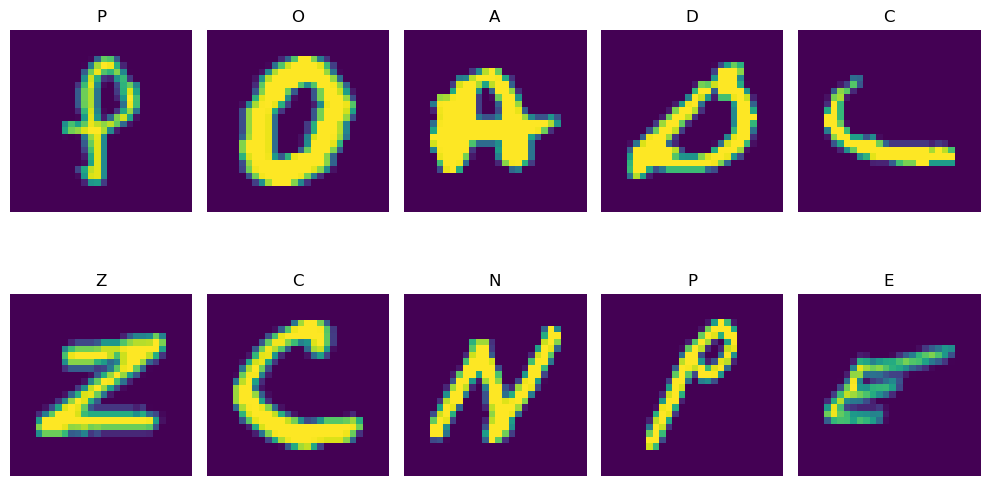

In [3]:
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

directory = 'C:/Users/pamar/Downloads/New folder/New folder'
# list comprehension 
images = []
labels = []

for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'):
            image_path = os.path.join(root, file)
            with Image.open(image_path) as img:
                images.append(img.copy())
            labels.append(file[0])

# Randomly select 10 images
random_images = random.sample(images, 10)
random_labels = [labels[images.index(img)] for img in random_images]

# Plot and show the randomly selected images
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
axs = axs.flatten()

for i in range(len(random_images)):
    axs[i].imshow(random_images[i])
    axs[i].axis('off')
    axs[i].set_title(random_labels[i])

plt.tight_layout()
plt.show()


In [4]:
# check the length of images 
len(images)

372451

In [9]:
np.array(images[5]).ndim

2

In [38]:
# show the images size 
np.array(images[0]).size

784

In [39]:
np.array(images[0]).shape

(28, 28)

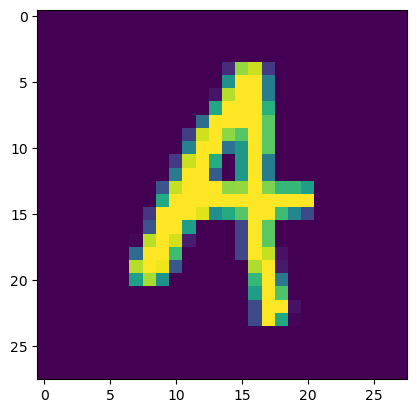

In [8]:
# show the images 
plt.imshow(images[0])

In [9]:
# converts images by 15*15
image_resized=[]
for i in images:
   i.thumbnail((15,15))
   image_resized.append(i)

In [10]:
# check length of resized image
len(image_resized)

372451

In [11]:
# check size of resized image 
np.array(image_resized[0]).size

225


#### Task A - Perform data preprocessing on the given image data and convert it into numerical vectors.


In [12]:
# converts the images into numerical by using flatten
flatten_list = [list(np.array(i).flatten()) for i in image_resized]

In [13]:
# create a data frame
letter_df = pd.DataFrame(flatten_list)

In [14]:
# assign labels to label column
letter_df['label'] = labels

In [15]:
# head of dataframe
letter_df.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [16]:
# tail
letter_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,label
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z
372450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Z


In [17]:
## checking the value counts of columns
letter_df[8].value_counts()


0     372449
18         1
9          1
Name: 8, dtype: int64

In [18]:
# to _csv file to save 
letter_df.to_csv('letters.csv')


In [9]:
# read the csv file
A_Z_df = pd.read_csv(r"C:\Users\pamar\Downloads\New folder\letters.csv")

In [10]:
# drop the uncessary column 
A_Z_df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
# head
A_Z_df.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [12]:
# detail of data
A_Z_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372451 entries, 0 to 372450
Columns: 226 entries, 0 to label
dtypes: int64(225), object(1)
memory usage: 642.2+ MB


In [13]:
# shape of data 
A_Z_df.shape

(372451, 226)

# DATASET IS UNBALANCED
- Based on the label column counts, the dataset is unbalanced, meaning that some classes have significantly more instances than others. 

In [14]:
# data of label cloumn counts checking
A_Z_df.label.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13870
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: label, dtype: int64

In [15]:
import plotly.graph_objects as go
import pandas as pd

# Create a DataFrame with label counts
label_counts = A_Z_df['label'].value_counts().reset_index()

# Create a bar chart
fig = go.Figure(data=go.Bar(
    x=label_counts['index'],
    y=label_counts['label'],
    marker_color='blue'
))

# Set the axis labels and title
fig.update_layout(
    xaxis=dict(title='Label'),
    yaxis=dict(title='Count'),
    title='Label Counts - A-Z Dataset'
)

# Show the chart
fig.show()


#### The countplot reveals that the label "O" has the highest count in the dataset, with approximately 57,825 occurrences. Following "O", the label "S" has the second highest count, with around 48,419 occurrences. These counts indicate the frequency of each label within the dataset

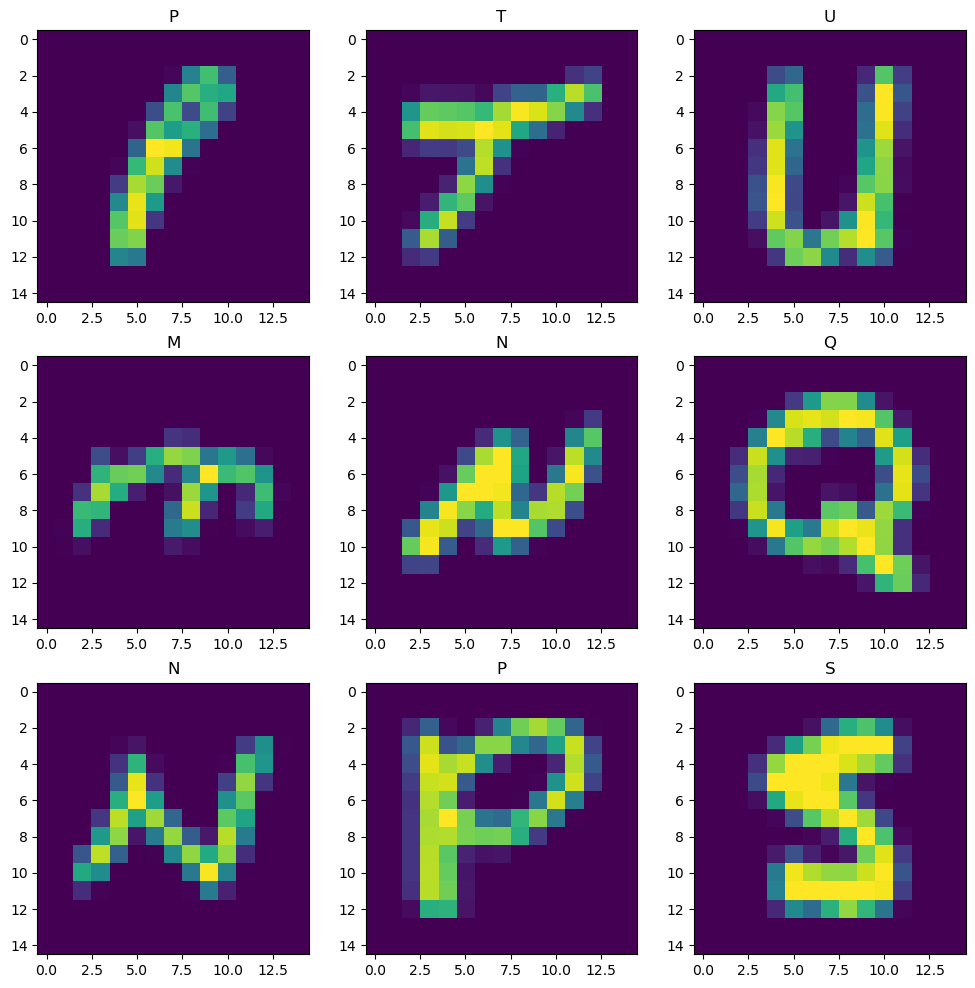

In [16]:
# create a x,y values
X = A_Z_df.drop('label', axis=1)
y = A_Z_df['label']
# To show images randomply after resized images
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, len(X), 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y.values[idx[i]])
    img_grid = np.reshape(X.values[idx[i]], (15,15))
    plt.imshow(img_grid)


## $\color{darkblue}{\text{Splitting Data into Training and Testing Sets:}}$


In [17]:
# train_test_split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
138377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
361826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# $$\color{darkgreen}{\text{Machine Learning Algorithms Overview}}$$
#### Logistic Regression:
- Definition:
Logistic Regression is a binary classification algorithm used to predict the probability of a binary outcome based on input features.
- Formula:Logistic Function (Sigmoid): σ(z) = 1 / (1 + e^(-z)).

- Hypothesis Function: h(x) = σ(β0 + β1x1 + β2x2 + ... + βn*xn).

- Loss Function: J(β) = (-1/m) * Σ[y*log(h(x)) + (1-y)*log(1-h(x))].

- Update Rule (Gradient Descent): βj := βj - α * (∂J(β)/∂βj).
        
#### Decision Tree:

- Definition: 
Decision Tree is a flowchart-like structure where internal nodes represent feature tests, branches represent feature outcomes, and leaf nodes represent class labels.
- Formula: 
Decision trees use conditional statements to split the data based on feature values until reaching leaf nodes that contain the class labels.

#### Random Forest:

- Definition: 
Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. Each tree is trained on a random subset of the data, and predictions are aggregated through voting or averaging.
- Formula: 
Random Forest builds a collection of decision trees and combines their predictions using voting or averaging methods to determine the final class label.
    
#### k-Nearest Neighbors (k-NN):

- Definition: 
k-Nearest Neighbors is a non-parametric algorithm that classifies an unknown data point based on the majority class of its k nearest neighbors in the feature space.
- Formula:
The class of an unknown data point is determined by the majority class of its k nearest neighbors using distance metrics such as Euclidean distance.

#### Support Vector Machines (SVM):

- Definition: 
Support Vector Machines is a binary classification algorithm that finds an optimal hyperplane in a high-dimensional feature space to separate the data into different classes while maximizing the margin between classes.
- Formula: 
SVM finds the hyperplane defined by w·x + b = 0 that maximizes the margin, where w is the weight vector, x is the input vector, and b is the bias term.

#### Naive Bayes:

- Definition: 
Naive Bayes is a probabilistic classifier based on Bayes' theorem with an assumption of independence between features. It calculates the posterior probability of a class given the input features.
- Formula:
P(y|X) = (P(X|y) * P(y)) / P(X), where P(y|X) is the posterior probability, P(X|y) is the likelihood, P(y) is the prior probability, and P(X) is the evidence.
#### XGBoost:
- Definition: 
XGBoost (Extreme Gradient Boosting) is an ensemble learning method that uses a gradient boosting framework to create a strong predictive model by combining multiple weak models called decision trees.
- Formula: 
XGBoost constructs a strong predictive model by iteratively training decision trees. Each tree is trained to minimize a loss function, and subsequent trees are built to correct the mistakes of the previous trees. The final prediction is made by summing the predictions of all the trees.

#### AdaBoost:
- Definition: 
AdaBoost (Adaptive Boosting) is an ensemble learning method that combines multiple weak classifiers to create a strong classifier. It focuses on the samples that were misclassified by previous classifiers, assigning them higher weights to improve their classification in subsequent iterations.
- Formula: 
AdaBoost assigns initial weights to training samples and trains a weak classifier. The weights are then adjusted based on the misclassified samples, giving higher weights to misclassified samples and lower weights to correctly classified samples. Multiple weak classifiers are trained in this manner, and their predictions are combined using weighted voting to obtain the final classification.

# $\color{darkblue}{\text{Metrics}}$
#### Accuracy Score:
- Accuracy score measures the overall correctness of the classification model. It is the ratio of the correctly classified samples to the total number of samples.
- Accuracy = (Number of Correctly Classified Samples) / (Total Number of Samples)

#### Precision Score:
- Precision score measures the ability of a classification model to correctly classify positive instances. It is the ratio of the correctly classified positive samples to the total number of samples predicted as positive.
- Precision = (Number of True Positives) / (Number of True Positives + Number of False Positives)

#### Recall Score:
- Recall score (also known as sensitivity or true positive rate) measures the ability of a classification model to identify all positive instances. It is the ratio of the correctly classified positive samples to the total number of actual positive samples.
- Recall = (Number of True Positives) / (Number of True Positives + Number of False Negatives)

#### F1 Score:
- F1 score is the harmonic mean of precision and recall scores. It provides a single value that combines both precision and recall, making it useful for evaluating the overall performance of a classification model.
- F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

#### Classification Report:
- A classification report is a summary of various evaluation metrics for each class in a classification problem. It includes precision, recall, F1 score, and support (the number of occurrences of each class in the true labels).

## $$\color{blueviolet}{\text{SPRINT 2:BUILD A MODEL}}$$
# $\color{darkred}{\text{Training and Evaluating Multiple Classifiers:}}$


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb

Algorithm = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
y_predct=[]
X_train, X_test, y_train, y_test

def train_classifiers(classifier):
    # Create the specified classifier
    if classifier == 'Logistic Regression':
        model = LogisticRegression()
        Algorithm.append("Logistic Regression")
    elif classifier == 'Decision Tree':
        model = DecisionTreeClassifier()
        Algorithm.append("Decision Tree")
    elif classifier == 'Random Forest':
        model = RandomForestClassifier()
        Algorithm.append("Random Forest")
    elif classifier == 'KNN':
        model = KNeighborsClassifier()
        Algorithm.append("KNeighborsClassifier")
    elif classifier == 'SVM':
        model = SVC()
        Algorithm.append("Support Vector Machines Classifier")
    elif classifier == 'Naive Bayes':
        model = GaussianNB()
        Algorithm.append("Naive Bayes Classifier")
    elif classifier == 'AdaBoost':
        model = AdaBoostClassifier()
        Algorithm.append("AdaBoost Classifier")
    else:
        raise ValueError("Invalid classifier specified.")

    # Train the classifier
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    y_predct.append(y_pred)
    Accuracy.append(accuracy)
    Precision.append(precision)
    F1_Score.append(f1)
    Recall.append(recall)
    
    print(f'{model}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Recall: {recall:.4f}')
    print('Classification Report:\n', report)
    
    # Generate the confusion matrix
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)


    # Create the heatmap trace
    heatmap_trace = go.Heatmap(
        z=confusion_matrix.values,
        x=confusion_matrix.columns,
        y=confusion_matrix.index,
        colorscale='Blues'
    )

    # Create the annotation array
    annotations = []
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix.columns)):
            annotations.append(
                dict(
                    x=j,
                    y=i,
                    text=str(confusion_matrix.iloc[i, j]),
                    showarrow=False,
                    font=dict(color='white' if confusion_matrix.iloc[i, j] > np.max(confusion_matrix.values) / 2 else 'black')
                )
            )

    # Set the data and layout
    data = [heatmap_trace]
    layout = go.Layout(
        title='Confusion Matrix',
        xaxis=dict(title='Predicted'),
        yaxis=dict(title='Actual'),
        annotations=annotations
    )

    # Create the figure
    fig = go.Figure(data=data, layout=layout)

    # Set the size of the plot
    fig.update_layout(
        autosize=False,
        width=1200,
        height=1000,
    )

    # Remove the slider
    fig.update_layout(
        xaxis=dict(
            rangeslider=dict(visible=False),
            type='category'
        )
    )

    # Show the figure
    fig.show()


# $\color{darkgreen}{\text{Visualizing Predicted and True Label Counts:}}$


In [31]:
import plotly.graph_objects as go
import pandas as pd

def create_grouped_bar_chart(df):
    # Calculate the count of predicted labels and true labels
    predicted_counts = df["Predicted Label"].value_counts()
    true_counts = df["True Label"].value_counts()

    # Get the unique labels
    labels = df["Predicted Label"].unique()
    labels.sort()  # Sort the labels in a consistent order

    # Create a bar chart
    fig = go.Figure()

    # Add the predicted counts bar
    fig.add_trace(go.Bar(
        x=labels,
        y=predicted_counts.loc[labels],  # Use loc to ensure consistent label order
        name='Predicted',
        marker_color='blue'
    ))

    # Add the true counts bar
    fig.add_trace(go.Bar(
        x=labels,
        y=true_counts.loc[labels],  # Use loc to ensure consistent label order
        name='True',
        marker_color='green'
    ))

    # Set the axis labels and title
    fig.update_layout(
        xaxis=dict(title='Label'),
        yaxis=dict(title='Count'),
        title='Count of Predicted and True Labels',
        barmode='group'
    )

    # Show the chart
    fig.show()


# $\color{red}{\text{LogisticRegression:}}$

In [32]:
train_classifiers('Logistic Regression')

LogisticRegression():
Accuracy: 0.8738
Precision: 0.8727
F1 Score: 0.8730
Recall: 0.8738
Classification Report:
               precision    recall  f1-score   support

           A       0.84      0.84      0.84      4204
           B       0.86      0.79      0.82      2656
           C       0.90      0.89      0.90      7048
           D       0.82      0.76      0.79      3005
           E       0.81      0.79      0.80      3402
           F       0.91      0.80      0.85       351
           G       0.82      0.75      0.78      1737
           H       0.75      0.73      0.74      2172
           I       0.87      0.79      0.83       350
           J       0.77      0.73      0.75      2538
           K       0.77      0.75      0.76      1650
           L       0.93      0.94      0.93      3459
           M       0.87      0.88      0.88      3694
           N       0.81      0.81      0.81      5760
           O       0.92      0.96      0.94     17569
           P       0.9

In [22]:
df1 = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_predct[0]})

In [23]:
create_grouped_bar_chart(df1)

# $\color{blue}{\text{DecisionTreeClassifier:}}$

In [33]:
train_classifiers('Decision Tree')

DecisionTreeClassifier():
Accuracy: 0.9478
Precision: 0.9477
F1 Score: 0.9477
Recall: 0.9478
Classification Report:
               precision    recall  f1-score   support

           A       0.93      0.93      0.93      4204
           B       0.91      0.89      0.90      2656
           C       0.96      0.97      0.96      7048
           D       0.89      0.91      0.90      3005
           E       0.93      0.92      0.92      3402
           F       0.91      0.84      0.87       351
           G       0.89      0.88      0.89      1737
           H       0.86      0.89      0.87      2172
           I       0.90      0.84      0.87       350
           J       0.92      0.94      0.93      2538
           K       0.91      0.89      0.90      1650
           L       0.95      0.97      0.96      3459
           M       0.94      0.90      0.92      3694
           N       0.93      0.94      0.94      5760
           O       0.98      0.98      0.98     17569
           P      

Predicted,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,All
Actual,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,3907,19,8,7,12,1,10,33,0,4,9,2,35,20,7,18,18,50,12,3,10,5,6,3,4,1,4204
B,13,2354,9,24,20,0,19,10,0,6,6,0,17,4,42,8,23,17,48,0,13,0,7,7,3,6,2656
C,4,8,6820,2,27,2,18,4,0,2,6,43,0,4,29,5,8,17,15,5,10,0,6,0,4,9,7048
D,6,24,3,2720,1,0,2,6,0,13,2,2,4,2,142,19,12,2,15,4,16,0,3,4,2,1,3005
E,11,19,46,4,3126,9,26,3,6,11,16,21,0,4,11,13,0,27,29,2,6,0,4,4,0,4,3402
F,0,0,1,0,13,296,1,0,0,6,2,0,0,0,4,19,0,1,0,8,0,0,0,0,0,0,351
G,19,21,26,1,20,0,1524,5,0,3,4,3,6,12,14,1,16,4,42,4,9,0,0,0,3,0,1737
H,30,7,4,3,6,0,8,1934,0,0,3,0,45,60,5,7,1,0,1,2,29,3,8,5,7,4,2172
I,0,3,0,0,4,1,0,0,293,15,0,2,0,1,1,0,0,1,8,4,0,0,1,5,3,8,350


In [64]:
df2 = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_predct[1]})
create_grouped_bar_chart(df2)

# $\color{purple}{\text{RandomForestClassifier:}}$

In [35]:
train_classifiers('Random Forest')

RandomForestClassifier():
Accuracy: 0.9850
Precision: 0.9850
F1 Score: 0.9850
Recall: 0.9850
Classification Report:
               precision    recall  f1-score   support

           A       0.97      0.99      0.98      4204
           B       0.98      0.97      0.98      2656
           C       0.99      0.99      0.99      7048
           D       0.97      0.96      0.97      3005
           E       0.99      0.97      0.98      3402
           F       0.99      0.92      0.95       351
           G       0.98      0.95      0.97      1737
           H       0.98      0.95      0.96      2172
           I       1.00      0.91      0.96       350
           J       0.98      0.97      0.98      2538
           K       0.98      0.97      0.97      1650
           L       0.99      0.99      0.99      3459
           M       0.98      0.97      0.97      3694
           N       0.97      0.99      0.98      5760
           O       0.99      1.00      0.99     17569
           P      

Predicted,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,All
Actual,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,4162,0,0,2,0,0,1,2,0,0,0,3,11,5,5,2,0,4,2,0,1,0,0,0,4,0,4204
B,14,2572,1,8,1,0,3,0,0,0,0,0,2,1,24,2,0,7,17,0,1,0,0,0,0,3,2656
C,2,2,6996,0,0,0,3,0,0,0,0,15,0,0,19,1,0,0,2,0,6,0,2,0,0,0,7048
D,0,5,0,2892,0,0,0,0,0,7,0,0,0,0,93,5,1,0,2,0,0,0,0,0,0,0,3005
E,0,2,43,0,3306,2,10,0,0,0,3,3,0,2,3,5,0,6,11,0,2,0,2,0,1,1,3402
F,1,0,0,0,4,322,0,0,0,0,0,0,0,0,0,17,0,0,1,6,0,0,0,0,0,0,351
G,5,11,15,2,3,0,1656,0,0,2,0,0,0,0,16,0,7,0,13,2,5,0,0,0,0,0,1737
H,29,3,0,0,0,0,2,2061,0,0,0,0,15,33,0,6,0,2,2,1,10,0,3,0,5,0,2172
I,0,0,1,0,0,0,0,0,320,8,0,0,0,0,0,1,0,0,10,3,0,0,0,0,0,7,350


In [65]:
df3 = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_predct[2]})
create_grouped_bar_chart(df3)

# $\color{darkgreen}{\text{KNeighborsClassifier:}}$

In [37]:
train_classifiers('KNN')

KNeighborsClassifier():
Accuracy: 0.9664
Precision: 0.9666
F1 Score: 0.9662
Recall: 0.9664
Classification Report:
               precision    recall  f1-score   support

           A       0.94      0.98      0.96      4204
           B       0.97      0.93      0.95      2656
           C       0.96      0.98      0.97      7048
           D       0.94      0.87      0.90      3005
           E       0.98      0.93      0.96      3402
           F       0.96      0.91      0.93       351
           G       0.97      0.89      0.93      1737
           H       0.92      0.93      0.92      2172
           I       0.98      0.91      0.94       350
           J       0.95      0.93      0.94      2538
           K       0.95      0.93      0.94      1650
           L       0.94      0.98      0.96      3459
           M       0.99      0.97      0.98      3694
           N       0.96      0.97      0.97      5760
           O       0.96      0.99      0.98     17569
           P       0

Predicted,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,All
Actual,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,4130,1,0,4,1,0,1,27,0,0,1,4,0,5,4,20,0,3,0,2,1,0,0,0,0,0,4204
B,19,2457,10,25,12,0,2,1,1,1,0,1,1,1,38,35,0,22,26,0,2,0,0,0,0,2,2656
C,2,3,6906,0,3,0,7,0,0,3,0,51,0,0,59,2,0,0,1,2,5,0,2,0,0,2,7048
D,8,10,1,2623,0,0,0,0,0,8,0,4,0,3,313,15,0,0,1,2,9,0,3,0,2,3,3005
E,2,6,103,4,3179,6,7,0,0,0,5,45,0,0,4,11,2,7,13,2,2,0,0,0,0,4,3402
F,0,0,0,0,3,318,0,0,0,1,1,0,0,0,0,13,0,0,0,15,0,0,0,0,0,0,351
G,8,13,59,1,10,0,1551,0,0,2,0,2,2,0,30,3,28,0,19,2,6,0,1,0,0,0,1737
H,47,0,0,0,0,1,0,2021,0,1,1,1,13,49,0,3,0,0,0,5,9,0,8,2,10,1,2172
I,0,0,1,0,0,0,0,0,317,11,0,1,0,0,0,1,0,0,3,16,0,0,0,0,0,0,350


In [66]:
df4 = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_predct[3]})
create_grouped_bar_chart(df4)

# $\color{darkblue}{\text{Support Vector Machines:}}$

In [39]:
train_classifiers('SVM')

SVC():
Accuracy: 0.9785
Precision: 0.9785
F1 Score: 0.9784
Recall: 0.9785
Classification Report:
               precision    recall  f1-score   support

           A       0.96      0.99      0.97      4204
           B       0.97      0.97      0.97      2656
           C       0.98      0.98      0.98      7048
           D       0.94      0.95      0.95      3005
           E       0.98      0.97      0.97      3402
           F       0.98      0.97      0.97       351
           G       0.97      0.94      0.95      1737
           H       0.96      0.93      0.95      2172
           I       0.99      0.92      0.96       350
           J       0.96      0.96      0.96      2538
           K       0.94      0.94      0.94      1650
           L       0.98      0.98      0.98      3459
           M       0.97      0.98      0.97      3694
           N       0.97      0.98      0.97      5760
           O       0.99      0.99      0.99     17569
           P       0.98      0.98    

Predicted,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,All
Actual,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,4144,1,0,2,0,0,1,16,0,0,2,3,5,8,1,5,0,7,0,1,3,0,2,3,0,0,4204
B,5,2570,0,10,6,0,4,3,0,0,1,0,5,1,15,5,0,19,5,0,3,0,2,0,1,1,2656
C,3,4,6928,0,11,0,2,0,0,1,1,32,0,2,37,2,0,1,2,1,14,0,1,0,3,3,7048
D,4,10,0,2848,1,0,1,0,0,5,0,0,2,3,113,9,1,0,1,0,3,0,4,0,0,0,3005
E,1,5,42,1,3291,4,13,0,0,2,8,3,0,0,0,6,1,10,6,1,2,0,3,1,2,0,3402
F,0,0,0,0,2,339,0,0,0,0,0,0,0,1,0,5,0,0,0,3,0,0,0,0,1,0,351
G,2,19,16,4,7,0,1631,1,0,4,0,0,1,2,12,1,15,1,13,2,3,0,3,0,0,0,1737
H,22,0,0,1,2,0,0,2018,0,1,2,2,27,54,0,3,0,2,3,2,9,0,8,2,13,1,2172
I,0,0,1,0,0,0,0,0,323,8,0,0,0,0,0,2,0,0,6,3,0,0,0,1,2,4,350


In [67]:
df5 = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_predct[4]})
create_grouped_bar_chart(df5)

# $\color{brown}{\text{Gaussian Naive_Bayes:}}$

In [33]:
train_classifiers('Naive Bayes')

GaussianNB():
Accuracy: 0.5228
Precision: 0.5830
F1 Score: 0.4806
Recall: 0.5228
Classification Report:
               precision    recall  f1-score   support

           A       0.37      0.01      0.01      4204
           B       0.43      0.25      0.32      2656
           C       0.89      0.45      0.60      7048
           D       0.63      0.32      0.43      3005
           E       0.62      0.27      0.38      3402
           F       0.05      0.96      0.10       351
           G       0.40      0.52      0.45      1737
           H       0.23      0.46      0.30      2172
           I       0.49      0.66      0.56       350
           J       0.39      0.08      0.13      2538
           K       0.15      0.00      0.01      1650
           L       0.52      0.80      0.63      3459
           M       0.41      0.89      0.56      3694
           N       0.48      0.57      0.52      5760
           O       0.64      0.93      0.76     17569
           P       0.60      0

In [68]:
df6 = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_predct[5]})
create_grouped_bar_chart(df6)

# $\color{olive}{\text{AdaBoostClassifier:}}$

In [43]:
train_classifiers('AdaBoost')

AdaBoostClassifier():
Accuracy: 0.5786
Precision: 0.5836
F1 Score: 0.5746
Recall: 0.5786
Classification Report:
               precision    recall  f1-score   support

           A       0.53      0.49      0.51      4204
           B       0.32      0.44      0.37      2656
           C       0.57      0.73      0.64      7048
           D       0.46      0.53      0.49      3005
           E       0.45      0.36      0.40      3402
           F       0.48      0.64      0.55       351
           G       0.15      0.12      0.13      1737
           H       0.42      0.18      0.26      2172
           I       0.18      0.75      0.29       350
           J       0.45      0.37      0.41      2538
           K       0.38      0.43      0.40      1650
           L       0.67      0.60      0.63      3459
           M       0.59      0.67      0.62      3694
           N       0.37      0.31      0.34      5760
           O       0.73      0.74      0.73     17569
           P       0.7

Predicted,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,All
Actual,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,2067,43,13,32,13,4,28,51,0,4,48,6,382,582,228,51,126,127,89,1,32,7,114,27,95,34,4204
B,46,1179,29,104,122,2,38,14,4,6,2,3,9,76,378,19,22,31,411,0,69,0,3,1,36,52,2656
C,10,28,5126,3,202,2,74,0,4,119,34,257,14,21,473,29,10,17,388,37,159,3,24,2,10,2,7048
D,11,90,75,1589,5,1,68,1,4,26,1,3,1,34,508,38,5,4,321,3,109,0,24,12,37,35,3005
E,29,258,300,16,1213,44,57,10,8,12,110,52,7,67,336,67,17,129,460,10,134,8,37,3,9,9,3402
F,8,0,0,0,14,225,3,1,0,0,7,0,0,1,2,43,0,7,3,33,1,2,0,0,1,0,351
G,25,48,188,12,35,5,201,0,0,13,3,9,4,8,221,3,42,5,833,1,74,0,4,1,0,2,1737
H,277,39,12,14,37,1,12,397,0,0,5,3,284,474,83,18,5,18,43,6,135,67,191,5,39,7,2172
I,0,0,0,0,1,0,0,0,262,8,1,1,0,0,1,7,0,2,44,7,0,0,0,9,2,5,350


In [69]:
df7 = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_predct[6]})
create_grouped_bar_chart(df7)

# $\color{orange}{\text{XGBClassifier:}}$

In [34]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable to numeric labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the XGBoost classifier
model = XGBClassifier()
Algorithm.append("XGBoost Classifier")
model.fit(X_train, y_train_encoded)

# Predict using the trained model
y_pred_encoded = model.predict(X_test)

# Decode the predicted labels back to alphabetical labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Append the evaluation metrics to the respective lists
y_predct.append(y_pred)
Accuracy.append(accuracy)
Precision.append(precision)
F1_Score.append(f1)
Recall.append(recall)
# Print the evaluation metrics
print(f'{model}:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Generate the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)


# Create the heatmap trace
heatmap_trace = go.Heatmap(
    z=confusion_matrix.values,
    x=confusion_matrix.columns,
    y=confusion_matrix.index,
    colorscale='Blues'
)

# Create the annotation array
annotations = []
for i in range(len(confusion_matrix)):
    for j in range(len(confusion_matrix.columns)):
        annotations.append(
            dict(
                x=j,
                y=i,
                text=str(confusion_matrix.iloc[i, j]),
                showarrow=False,
                font=dict(color='white' if confusion_matrix.iloc[i, j] > np.max(confusion_matrix.values) / 2 else 'black')
            )
        )

# Set the data and layout
data = [heatmap_trace]
layout = go.Layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted'),
    yaxis=dict(title='Actual'),
    annotations=annotations
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Set the size of the plot
fig.update_layout(
    autosize=False,
    width=1200,
    height=1000,
)

# Remove the slider
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=False),
        type='category'
    )
)

# Show the figure
fig.show()



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...):
Accuracy: 0.9883
Precision: 0.9883
Recall: 0.9883
F1-Score: 0.9883


In [8]:
import plotly.graph_objects as go

# Generate the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Create the heatmap trace
heatmap_trace = go.Heatmap(
    z=confusion_matrix.values,
    x=confusion_matrix.columns,
    y=confusion_matrix.index,
    colorscale='Blues'
)

# Create the data array
data = [heatmap_trace]

# Set the layout
layout = go.Layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted'),
    yaxis=dict(title='Actual')
)

# Set the figure size
fig = go.Figure(data=data, layout=layout)

# Set the size of the plot
fig.update_layout(
    autosize=False,
    width=600,
    height=500,
)

# Remove the slider
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=False),
        type='category'
    )
)

# Show the figure
fig.show()


NameError: name 'y_test' is not defined

In [70]:
df8 = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_predct[7]})
create_grouped_bar_chart(df8)

In [52]:
import pickle 
# Save the model and evaluation metrics to a pickle file
xgboost = {
    'model': model,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

with open('xgboost_model_results.pkl', 'wb') as file:
    pickle.dump(xgboost, file)

## DataFrame to store algorithm names and corresponding accuracies :

In [47]:
# Create a DataFrame to store algorithm names and corresponding accuracies
df= pd.DataFrame({"Algorithm": Algorithm, "Accuracy": Accuracy,"Precision":Precision,"F1_Score":F1_Score,"Recall":Recall})

# Print the DataFrame
df



,Algorithm,Accuracy,Precision,F1_Score,Recall
0,Logistic Regression,0.873792,0.872685,0.872952,0.873792
1,Decision Tree,0.947806,0.947743,0.947721,0.947806
2,Random Forest,0.985009,0.985030,0.984962,0.985009
3,KNeighborsClassifier,0.966421,0.966630,0.966156,0.966421
4,Support Vector Machines Classifier,0.978458,0.978470,0.978423,0.978458
5,Naive Bayes Classifier,0.522822,0.583013,0.480586,0.522822
6,AdaBoost Classifier,0.578587,0.583618,0.574587,0.578587
7,XGBoost Classifier,0.988276,0.988288,0.988267,0.988276


In [53]:
import pickle

# Create a dictionary to store the results
results = {
    'Algorithm': 'Random Forest',
    'Accuracy': 0.985009,
    'Precision': 0.985030,
    'F1_Score': 0.984962,
    'Recall': 0.985009
}

# Save the results to a pickle file
with open('random_forest_results.pkl', 'wb') as file:
    pickle.dump(results, file)



# $\color{red}{\text{Accuracy of Algorithms:}}$


In [49]:
import plotly.graph_objects as go
import plotly.colors as colors

# Define the colors for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Create the Accuracy plot using Plotly
fig_accuracy = go.Figure()
fig_accuracy.add_trace(go.Bar(
    x=df['Algorithm'],
    y=df['Accuracy'],
    name='Accuracy',
    marker_color=colors
))
fig_accuracy.update_layout(
    title='Accuracy of Algorithms',
    xaxis_title='Algorithm',
    yaxis_title='Accuracy',
    width=800,
    height=600,
    font=dict(size=14)
)
fig_accuracy.update_xaxes(tickangle=45)
fig_accuracy.update_yaxes(tickfont=dict(size=12))

# Create the Precision plot using Plotly
fig_precision = go.Figure()
fig_precision.add_trace(go.Bar(
    x=df['Algorithm'],
    y=df['Precision'],
    name='Precision',
    marker_color=colors
))
fig_precision.update_layout(
    title='Precision of Algorithms',
    xaxis_title='Algorithm',
    yaxis_title='Precision',
    width=800,
    height=600,
    font=dict(size=14)
)
fig_precision.update_xaxes(tickangle=45)
fig_precision.update_yaxes(tickfont=dict(size=12))

# Create the Recall plot using Plotly
fig_recall = go.Figure()
fig_recall.add_trace(go.Bar(
    x=df['Algorithm'],
    y=df['Recall'],
    name='Recall',
    marker_color=colors
))
fig_recall.update_layout(
    title='Recall of Algorithms',
    xaxis_title='Algorithm',
    yaxis_title='Recall',
    width=800,
    height=600,
    font=dict(size=14)
)
fig_recall.update_xaxes(tickangle=45)
fig_recall.update_yaxes(tickfont=dict(size=12))

# Create the F1-Score plot using Plotly
fig_f1_score = go.Figure()
fig_f1_score.add_trace(go.Bar(
    x=df['Algorithm'],
    y=df['F1_Score'],
    name='F1-Score',
    marker_color=colors
))
fig_f1_score.update_layout(
    title='F1-Score of Algorithms',
    xaxis_title='Algorithm',
    yaxis_title='F1-Score',
    width=800,
    height=600,
    font=dict(size=14)
)
fig_f1_score.update_xaxes(tickangle=45)
fig_f1_score.update_yaxes(tickfont=dict(size=12))

# Add value labels on top of each bar
for fig in [fig_accuracy, fig_precision, fig_recall, fig_f1_score]:
    for trace in fig.data:
        fig.update_traces(text=trace.y, textposition='auto', texttemplate='%{text:.3f}')

# Display the plots
fig_accuracy.show()
fig_precision.show()
fig_recall.show()
fig_f1_score.show()


### Observations:

- The algorithms with the highest accuracy, precision, F1-score, and recall are XGBoost Classifier and Random Forest.
- Naive Bayes Classifier and AdaBoost Classifier have lower accuracy, precision, F1-score, and recall compared to other algorithms.
- Logistic Regression, Decision Tree, KNeighborsClassifier, and Support Vector Machines Classifier perform well with reasonably high scores in all metrics.
- XGBoost Classifier has the highest scores in all metrics, indicating its superior performance in this evaluation.
- Naive Bayes Classifier has significantly lower scores compared to other algorithms, suggesting that it may not be suitable for this specific dataset.

### Conclusions:

- Based on the evaluation of different algorithms on the given dataset, it can be concluded that XGBoost Classifier and Random Forest are the top-performing algorithms. 
- These algorithms consistently exhibit high accuracy, precision, F1-score, and recall, indicating their effectiveness in predicting the target variable. 
- On the other hand, Naive Bayes Classifier performs poorly in comparison to the other algorithms. 
- Therefore, for this dataset, it is recommended to consider XGBoost Classifier or Random Forest as the preferred algorithms for accurate predictions.

### Model should be light for deployment.
For deployment purposes, it is recommended to choose a model that is light in terms of size. This means selecting a model that has a smaller memory footprint and requires less storage space. Models like Decision Tree, Logistic Regression, and Naive Bayes Classifier, which have lower accuracy but are relatively simpler and smaller, can be considered in scenarios where lightweight models are preferred.

### Model should have very less latency.

If low latency is a critical requirement, it is advisable to select models that can make predictions quickly without significant delays. In this case, algorithms like Decision Tree, Support Vector Machines (SVM), and Logistic Regression can be suitable choices, as they have relatively high accuracy and are known for their fast prediction times.

In [1]:
! pip install shapash


     -------------------------------------- 652.7/652.7 kB 6.8 MB/s eta 0:00:00
     --------------------------------------- 10.2/10.2 MB 11.5 MB/s eta 0:00:00
     -------------------------------------- 220.6/220.6 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 81.9/81.9 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 642.7/642.7 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013926 sha256=76fb3ecef389f10e6d91a541e324042992e3ae84872d4f0b7261b7f2b46681e4
  Stored in directory: c:\users\pamar\appdata\local\pip\cache\wheels\e6\71\e5\1b784262cf55b82bf6b9b23eeacbe9c834121c51e362cd4007
  Created wheel for da

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
from shapash.explainer.smart_explainer import SmartExplainer


In [33]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable to numeric labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# Train the XGBoost classifier
model = XGBClassifier()

model.fit(X_train, y_train_encoded)

# Predict using the trained model
y_pred_encoded = model.predict(X_test)

# Decode the predicted labels back to alphabetical labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')z
# Print the evaluation metrics
print(f'{model}:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
# Create the SmartExplainer object
xpl = SmartExplainer()
xpl.compile(
    x=X_test,
    model=model,
)

# Plot contributions
xpl.plot_contributions()
# Generate the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Display the styled confusion matrix
confusion_matrix.style.background_gradient(cmap="tab10")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...):
Accuracy: 0.9883
Precision: 0.9883
Recall: 0.9883
F1-Score: 0.9883


TypeError: SmartExplainer.__init__() missing 1 required positional argument: 'model'

In [29]:
train_classifiers_with_explanations('Logistic Regression')


LogisticRegression():
Accuracy: 0.8738
Precision: 0.8727
F1 Score: 0.8730
Recall: 0.8738
Classification Report:
               precision    recall  f1-score   support

           A       0.84      0.84      0.84      4204
           B       0.86      0.79      0.82      2656
           C       0.90      0.89      0.90      7048
           D       0.82      0.76      0.79      3005
           E       0.81      0.79      0.80      3402
           F       0.91      0.80      0.85       351
           G       0.82      0.75      0.78      1737
           H       0.75      0.73      0.74      2172
           I       0.87      0.79      0.83       350
           J       0.77      0.73      0.75      2538
           K       0.77      0.75      0.76      1650
           L       0.93      0.94      0.93      3459
           M       0.87      0.88      0.88      3694
           N       0.81      0.81      0.81      5760
           O       0.92      0.96      0.94     17569
           P       0.9

TypeError: SmartExplainer.__init__() missing 1 required positional argument: 'model'

In [5]:
import plotly.graph_objects as go

# Define the algorithms and their corresponding metrics
algorithms = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'KNeighborsClassifier',
    'Support Vector Machines Classifier',
    'Naive Bayes Classifier',
    'AdaBoost Classifier',
    'XGBoost Classifier'
]

accuracy = [0.873792, 0.947806, 0.985009, 0.966421, 0.978458, 0.522822, 0.578587, 0.988276]
precision = [0.872685, 0.947743, 0.985030, 0.966630, 0.978470, 0.583013, 0.583618, 0.988288]
recall = [0.873792, 0.947806, 0.985009, 0.966421, 0.978458, 0.522822, 0.578587, 0.988276]
f1_score = [0.872952, 0.947721, 0.984962, 0.966156, 0.978423, 0.480586, 0.574587, 0.988267]

# Create the trace for each metric with text values
accuracy_trace = go.Bar(x=algorithms, y=accuracy, name='Accuracy', text=accuracy, textposition='auto')
precision_trace = go.Bar(x=algorithms, y=precision, name='Precision', text=precision, textposition='auto')
recall_trace = go.Bar(x=algorithms, y=recall, name='Recall', text=recall, textposition='auto')
f1_score_trace = go.Bar(x=algorithms, y=f1_score, name='F1-Score', text=f1_score, textposition='auto')

# Create the data array
data = [accuracy_trace, precision_trace, recall_trace, f1_score_trace]

# Set the layout
layout = go.Layout(
    title='Performance Metrics of Classification Algorithms',
    xaxis=dict(title='Algorithms'),
    yaxis=dict(title='Score'),
    barmode='group'
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()
